<a href="https://colab.research.google.com/github/alexjochs/ECE_539_Penguins/blob/aochs%2Fdownload_data/fix_missing_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning
lots of messy annotations in dataset. Goal is to clean up annotations so that any form of NaN is stored as an empty list. Includes xy: null and xy : ["NaN"]

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

gdrive_data_filepath = r"/content/gdrive/MyDrive/'Penguin_counting'/data_peng_watch"


Mounted at /content/gdrive


In [43]:
import os
import pandas as pd
import json
import numpy as np
from tqdm import tqdm

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

In [6]:
MASTER_LIST = ['BAILa', 'DAMOa', 'HALFb', 'HALFc', 'LOCKb', 'MAIVb', 'MAIVc', 'NEKOa', 'NEKOb', 'NEKOc', 'PETEc', 'PETEd', 'PETEf', 'SPIGa', 'GEORa']
VM_ROOT = r'/content'
# TODO: revert back to None
cwd = None
working_list = MASTER_LIST

def get_new_batch(target=None, load_all=False):
    assert target == None or load_all == False, f"can't get specific folder: {target} and load all data"
    if not target:
        target = working_list[0]
    tgz_name = target + '.tgz'
    folder_path = os.path.join(gdrive_data_filepath, tgz_name)
    !tar --gunzip --extract --verbose --file={folder_path} --directory {VM_ROOT}
    cwd = os.path.join(VM_ROOT, target)
    if not target:
        working_list.pop(0)
    if load_all:
        # recursion :/
        get_new_batch()

def save_batch_to_drive(target=None, save_all=False):
    # take working files, save them back to Gdrive
    assert target == None or save_all == False, f"can't get specific folder: {target} and load all data"
    tgz_name = target + '.tgz'
    folder_path = os.path.join(gdrive_data_filepath, tgz_name)
    !tar -c -f -z -v {tgz_name} {folder_path}

In [ ]:
# get_new_batch(target='CompleteAnnotations_2016-07-11')

In [22]:
annotations_path = VM_ROOT + r'/CompleteAnnotations_2016-07-11'

def run_all():
    json_filepath_list = get_json_files_from_folder()
    for filepath in json_filepath_list:
        df = run(filepath_=filepath)
        save_df_as_json(df)

def run(filepath_=None, target=None):
    assert filepath_ is not None, "at this time run() method needs a full filepath"
    data_group_name = filepath_[-10:-5]
    df = load_json_as_df(filepath_)
    df.loc[df.xy.isnull(), 'xy'] = [[]]
    # have to check if inner list has na values as well :/
    df_xy_ = to_1D(df['xy'])
    if df_xy_.isna().sum() > 0:
        df_xy_na_mask = df_xy_.isna()
        df.loc[df_xy_na_mask, 'xy'] = [[]]
    return df

def save_df_as_json(df):
    data_group_filename = df['imName'].iloc[0][:5] + '.json'
    try:
        os.mkdir('/content/annotations')
    except FileExistsError as e:
        print('looks like local annotations folder already exists!')
    print(data_group_filename)
    with open(os.path.join('/content/annotations', data_group_filename), 'w') as json_file:
        json.dump(json.loads(df.to_json(orient='records')), json_file)

def get_json_files_from_folder():
    json_filepath_list = []
    for filename in os.listdir(annotations_path):
        f = os.path.join(annotations_path, filename)
        if os.path.isfile(f):
            file_extension = os.path.splitext(f)[1]
        if file_extension == '.json':
            json_filepath_list.append(f)
    return json_filepath_list

def load_json_as_df(filepath):
    with open(filepath,'r') as json_file:
        json_data = json.loads(json_file.read())
    return pd.json_normalize(json_data, record_path =['dots'])

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])


In [12]:
df = run_all()

BAILa
_NaN_
total xy lists of NaN is 39
              imName                                                 xy
0  BAILa2014a_000001  [[[350, 1455], [849, 1327], [1129, 1042], [73,...
1  BAILa2014a_000002                                                 []
2  BAILa2014a_000003  [[[48, 293], [62, 293], [46, 319], [71, 314], ...
3  BAILa2014a_000004  [[[1340, 1140], [914, 1335], [192, 1162], [35,...
4  BAILa2014a_000005  [[[1022, 1309], [161, 1167], [23, 875], [530, ...


# Attempt to load an annotation and image, #192476342324?

In [24]:
df_baila = run(filepath_=r'/content/CompleteAnnotations_2016-07-11/BAILa.json')
df_baila.head()

In [29]:
img1_dots = df_baila['xy'].iloc[0]
img1 = image.imread(os.path.join('/content/BAILa', df_baila['imName'].iloc[0]) + '.JPG')

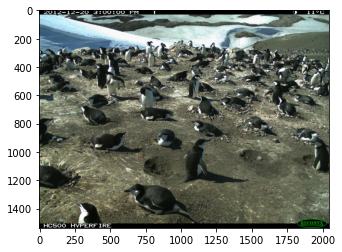

In [30]:
pyplot.imshow(img1)

In [31]:
img1.shape

(1536, 2048, 3)

In [40]:
def get_longest_dot_list(dots):
    if len(dots) > 1:
        for list in dots:
            print(list)
            print(len(list))
    else:
        return dots[0]

In [42]:
dots = get_longest_dot_list(img1_dots)
print(len(dots))

97


In [44]:
def make_dot_image(img_shape, dots):
    # np.zeros(img_shape[0], img_shape[1])
    for dot in dots:
        print(dot)
        break

In [46]:
make_dot_image(img1.shape, dots)

[350, 1455]
